# STUDENT NAME - KUNGA NYIMA GURUNG
# STUDENT ID - NP03A190113
# SECTION - L6CG5
# WLV ID - 2050453

# 1.Data Understanding and Cleaning

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('heart_disease.csv')

In [3]:
df.shape

(1025, 14)

In [4]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
#are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# 2.Data Analysis and Visualization

As there are multiple columns in my dataset.However, it is not necessary that all the columns are needed to predict my
output.So, inorder to predict my outcome data exploration and data visualization is necessary. So I need to refine the
dataset and see which columns are more important to predict my better result.I need to refine those columns that are
needed to give a better result that is 'target' that determines wether a person is suffering from heart disease or not.

In [8]:
#finding how many of each class there , 1 equals Yes(has heart disease) & 0 equlas No
df["target"].value_counts()

1    526
0    499
Name: target, dtype: int64

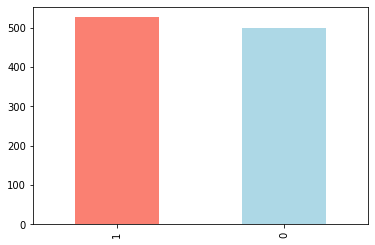

In [9]:
# Plot the value counts with a bar graph
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
#compare our target column with the sex column.
#Note: from the data dictionary for the target column, 1 = heart disease present, 0 = no heart disease. And for sex, 1 = male, 0 = female.
df.sex.value_counts()

1    713
0    312
Name: sex, dtype: int64

In [12]:
#compare target column with sex coulmn

pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,86,413
1,226,300


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

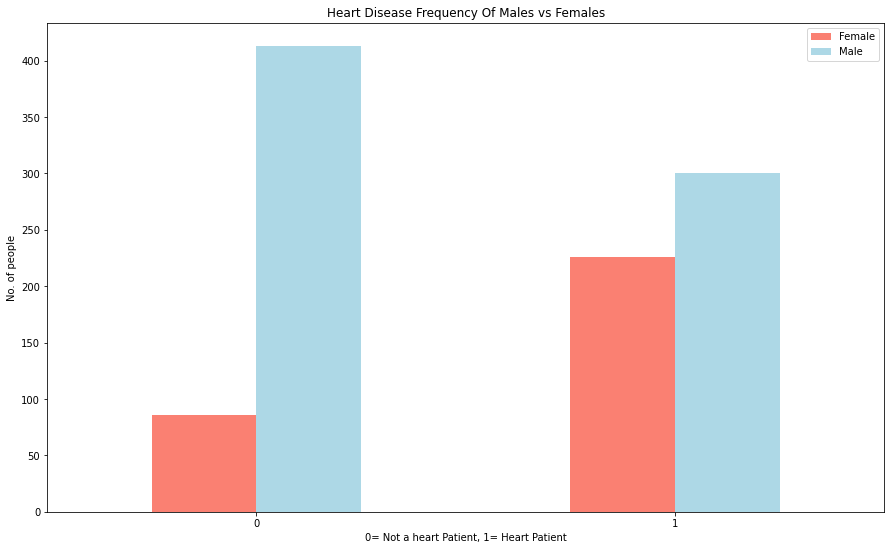

In [13]:
#creating a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                  figsize=(15,9),
                                  color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency Of Males vs Females")
plt.xlabel("0= Not a heart Patient, 1= Heart Patient")
plt.ylabel("No. of people")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0)

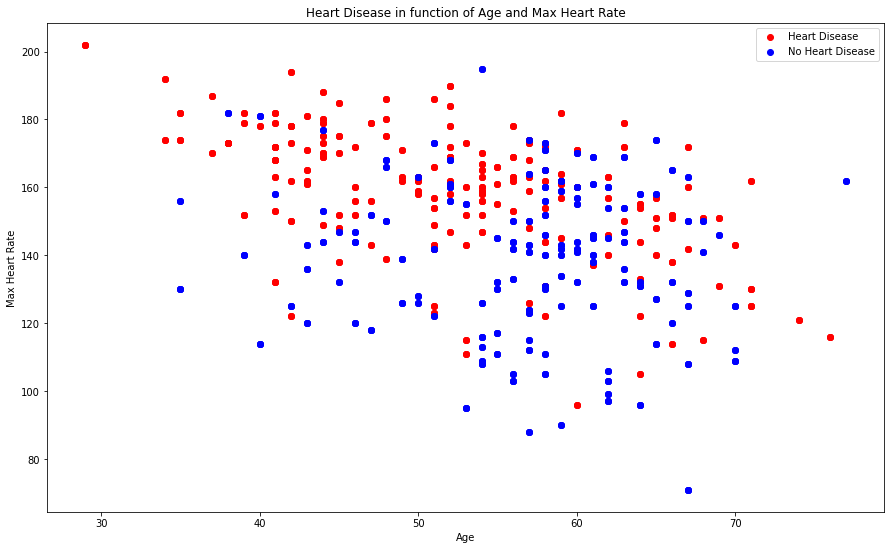

In [14]:
#create another figure
plt.figure(figsize=(15, 9))

#scatter plot with heart disease as positive
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
           c='red')

#scatter plot with heart disease as negative
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
           c='blue');

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Heart Disease", "No Heart Disease"])
plt.ylabel("Max Heart Rate");

In [15]:
#comparing all of the independent variables in one hit.
#Why?
#Because this may give an idea of which independent variables may or may not have an impact on our target variab


# Finding the correlation between our independent variables
corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


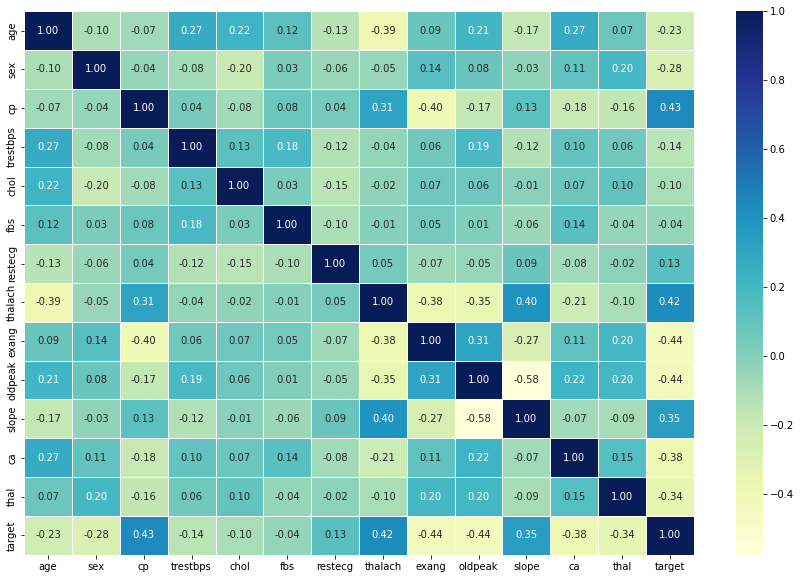

In [16]:
# making the matrix look a little prettier
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

In [17]:
positive = df[df.target==1]
positive.shape


(526, 14)

From my dataframe, the 'target' column contains the value 1 and 0 that determine whether the person is suffering from
heart disease or not. Data with the value 1 in the 'target' column is assigned as p'positive' which means that the person is
suffering from heart disease.According to my dataset, 526 people are suffering from heart disease

In [18]:
negative=df[df.target==0]
negative.shape

(499, 14)

Data with the value 0 in the 'target' column is assigned as 'negative' which means that the person is not suffering from
heart disease. According to my dataset, 499 people are not suffering from heart disease which is slightly less as compared
to those who are suffering from heart disease.

# Average numbers

groupby is used in my data,so that i can seperate the'target' column from other columns and simply fine the mean value of
all the retained columns.

In [19]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


### Exploring and visualizing my data.

From above table we can draw following conclusions,

 1.**age**:our risk of heart disease increases as you get older. Men
age 45 and older and women age 55 and older have a greater risk. age level seems to be relatively low(52.40) in people
suffering from heart disease VS the people not suffering from heart disease(56.56) 

 2.**sex**:Researchers found that
throughout life, men were about twice as likely as women to have a heart attack. sex level are higher in people not suffering
from heart disease than people suffering from heart disease(0.82 vs 0.57)
 3.**cp**:cp is nothing but a chest pain type. cp
level is higher in the person suffering from heart disease than those who dont(1.37 vs 0.48) 

 4.**trestbps**:This column is
used to measure the blood pressure. trestbps level is slightly greater in negative than positive(134 vs 129)

 5.**chol**:This
column is used to measure the cholesterol level which is slightly more in negative than the negative(251 vs 240).

 6.**fbs**:this column is used to measure fasting plood pressure in which fbs>120=1 and fbs<120=0.nothing much
differende between positive and negative. 

 7.**restecg**:it is nothing but resting electro cordiographic result that shows 0 as
normal and 1 as abnormal which is slightly greater in positive than negative(0.59 vs 0.45) 

 8.**thalach**:This colum
determines the maximum heart rate achieved.which is greater in person suffering from heart disease than who doesnt.(158
vs 139)

 9.**exang**:This column determine wether exercise included or not 1=yes and 0=no which is greater in person who
are healtier(0.55 vs 0.13) 

 10.**oldpeak**:it is nothing but pressure included by exercise relative to rest.which is greater in
person who is not suffering from heart disease.(1.60 vs0.56) 

 11.**slope**:it is also nothing but the peak exercise.which is
slightly difference (1.16 vs 1.59) 

 12.**ca**:it is nothing but number of measured vessels(1.16 vs 0.37)

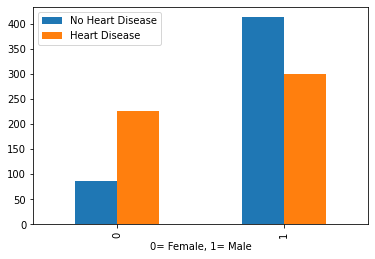

In [20]:
pd.crosstab(df.sex,df.target).plot(kind='bar')
plt.xlabel("0= Female, 1= Male")
plt.legend(["No Heart Disease", "Heart Disease"])

From the bar graph, we can conclude that person who are suffering from heart disease is more in case of male than the
female in my dataset however those who are not suffering from heart disease is also more in the dataset *Incase of
male,the percentage of person who are not suffering from heart disease is more where as the percentagee of person who
are suffering from heart disease is more in case of female than those who are not suffering from heart disease.

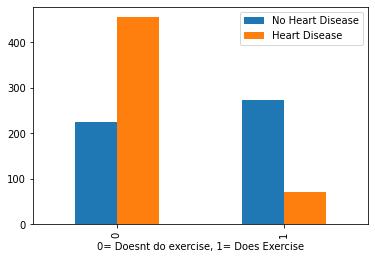

In [21]:
pd.crosstab(df.exang,df.target).plot(kind='bar')
plt.xlabel("0= Doesnt do exercise, 1= Does Exercise")
plt.legend(["No Heart Disease", "Heart Disease"])

From the bar graph, we can conclude that those people who does exercise are more healthier and have less chances of
heart disease as compared to those who doesnt do exercises.


## From the data analysis so far we can conclude that we will use following variables as independent variable in our model.


1.**age** 2.**sex** 3.**cp** 4.**trestbps** 5.**chol** 6.**thalach** 7.**exang**
From my dataset, I have chosen these seven columns as independent variable that helps in determining whether the person is suffering from heart disease or not. Other columns such as fbs,restecg,oldpeak,slope,ca,thal are not treated as major hence i will ignore these columns from my analysis.

In [22]:
subdata=df[['age','sex','trestbps','chol','thalach','exang']]
subdata.head()

,age,sex,trestbps,chol,thalach,exang
0,52,1,125,212,168,0
1,53,1,140,203,155,1
2,70,1,145,174,125,1
3,61,1,148,203,161,0
4,62,0,138,294,106,0


From my dataset, I have created a sub-dataset that contains only the variables that are important in predicting my data.
Hence from above table we can conclude that the subdata contains only the variables that are needed.

In [23]:
x=subdata
x.head()

,age,sex,trestbps,chol,thalach,exang
0,52,1,125,212,168,0
1,53,1,140,203,155,1
2,70,1,145,174,125,1
3,61,1,148,203,161,0
4,62,0,138,294,106,0


All the values of subdata are assigned to X. The first five values are displayed

In [24]:
y=df.target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

All the value of 'target' column is assigned to y and defined as output in the form of binary classification in terms of 0 and
1.


# Logistic Regression Implementation

Inorder to implement logistic regression i prefer using libraries. Inorder to use the libraries it is better to split my data in the form of training seta and test set.

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.5)

with the help of sklern libraries ,my dataset is splitted in the form of input as x and output as y with the train size=0.5. The train_size paramater is used in order to divide the data for training and testing.In my case i have used 50% of the datas for testing and 50% for training.


In [26]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

With the help of sklearn I have imported LogisticRegression and initiate as model.

In [27]:
model.fit(X_train,Y_train)

LogisticRegression()

In [28]:
model.predict(X_test)

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,

In [29]:
Y_predict=model.predict(X_test)
print('Accuracy of logistic regression classifier on test set is:',((model.score(X_test,Y_test)*100)))

Accuracy of logistic regression classifier on test set is: 76.41325536062378


Accuracy of my model is determined with the help of score function. In my case, the accuracy of my model is 77%
changes.Likewise,if there is changes in the train size for testing,the accuracy may change.

# CONFUSION MATRIX

[[185  75]
 [ 46 207]]


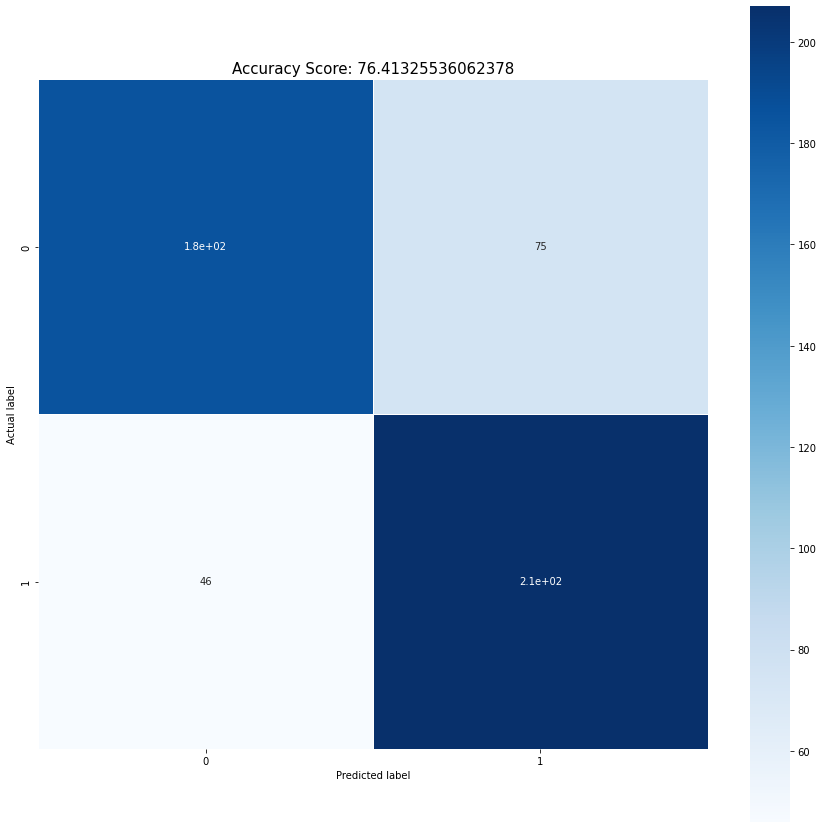

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(Y_test,Y_predict)
plt.figure(figsize=(15,15))
sns.heatmap(data=confusion_matrix,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(model.score(X_test, Y_test)*100)
plt.title(all_sample_title, size = 15)
print(confusion_matrix)

In [31]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75       260
           1       0.73      0.82      0.77       253

    accuracy                           0.76       513
   macro avg       0.77      0.76      0.76       513
weighted avg       0.77      0.76      0.76       513



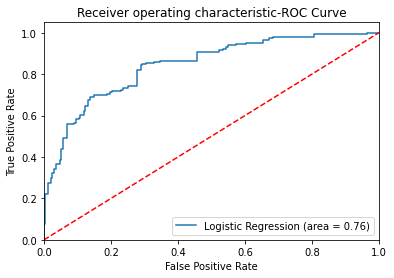

In [32]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic-ROC Curve')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


ROC(Receiver Operating Characteristic) curve can be obtained with the help of True Positive Rate(TPR) and False Positive
Rate Rate(FPR).The TPR defines how many correct positive result occured among all the true samples available and FPR
defines how many incorrect result occured among all False samples available during the test. AN ROC space can be defined
by FPR as x-axis and TPR as y-axis and helps in depiciting relative trade-offs between true positive(TP) and false positive(FP)
The ROC Curve is also known as the sensitivity vs (1-specificity) plot because,TPR is equivalent to sensitivity and FPR is equal to 1 − specificity. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).


In [33]:
MSE = np.square(np.subtract(Y_test,Y_predict).mean())
RMSE = np.sqrt(MSE)
print('Mean Squared Error= ',MSE)
print("Root Mean Squared Error= ",RMSE)


Mean Squared Error=  0.003195665142930968
Root Mean Squared Error=  0.056530214424951264


RMSE is basically used to measure the average error that is performed by the model in its predictions.Mathematically, we
can say that RMSE is the squared root of Mean Squared Error(MSE).Meanwhile, MSE is the average squared differences
between the actual and the predicted values of the model. We can say the lower the RMSE,then better the model is.In this
case,the RMSE is 0.013 which is low and determines that the model is good.

In [34]:
import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(Y_test,Y_predict)
print("Mean Absolute Error= ",mae)

Mean Absolute Error=  0.23586744639376217


MEA is simply defined as the average of the absolute error.MEA is generally used when there is fewer or no outliner and
want to accommodate them while fitting your model.In this case, Y_test is used as the actual outcome and Y_predict as the
predicted outcome.Lower the MAE better the model is assumed.The MAE is 0.2 and conclude that the model is good.


# 3.Build Primary Model

In [35]:
dataset = pd.read_csv('heart_disease.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [37]:
#Seperate Features and Targets
features = dataset.iloc[:,:-1]
target = dataset.iloc[:,-1:]


In [38]:
# Code Test 
assert features.shape[0] == target.shape[0] , "Number of datasets in featurees and Target variables are not equal"

In [39]:
# import necessary  library from sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=42)

# Instantiating the KNN Algorithm

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [41]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

# Accuracy

In [42]:
y_pred = knn.predict(X_test)

In [43]:
y_pred = knn.predict(X_test)
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       102
           1       0.90      0.91      0.90       103

    accuracy                           0.90       205
   macro avg       0.90      0.90      0.90       205
weighted avg       0.90      0.90      0.90       205



# Cross-Validation

In [44]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}

In [45]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [46]:
knn_cv.best_score_

0.9719512195121951

In [47]:
knn_cv.best_params_

{'n_neighbors': 1}

# Feature Selection

In [48]:
# Re-evaluate Datasets:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [49]:
features.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [50]:
# necessary imports:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Your Code Here(Uncomment best_features and write your code):
best_features = SelectKBest(score_func=chi2, k='all')
fit = best_features.fit(features, target) # Run score function on (X, y) and get the appropriate features.
#select_kbest = best_features.fit_transform(features, target)

In [51]:
# Storing features and there score value in dataframes:
dfscores = pd.DataFrame(fit.scores_)
dfcoloumns = pd.DataFrame(features.columns)
# Concat two dataframes for better visualization
features_scores = pd.concat([dfcoloumns, dfscores], axis = 1)
features_scores.columns = ["Features", "Scores"] # naming the dataframe Coloumns
# saving dataframe to csv
name = "feature_scores"
features_scores.to_csv(name)
features_scores.head(15)

,Features,Scores
0,age,81.425368
1,sex,24.373650
2,cp,217.823922
3,trestbps,45.974069
4,chol,110.723364
5,fbs,1.477550
6,restecg,9.739343
7,thalach,650.008493
8,exang,130.470927
9,oldpeak,253.653461


In [52]:
select_kbest = best_features.fit_transform(features, target)

In [53]:
select_kbest.dtype

dtype('float64')

# Implement K-NN with only selected Feature

In [54]:
#calculate correlation:
    #Hint: --.corr() function of pandas
# Your Code Here:
features_corr = features.corr()
features_corr.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244


<AxesSubplot:>

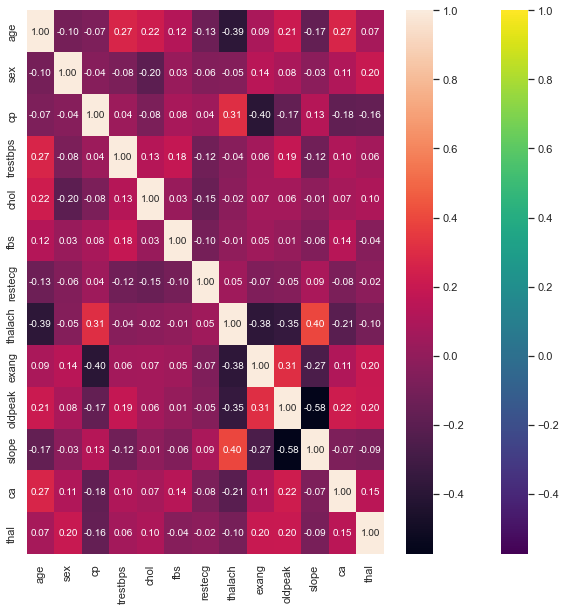

In [55]:
# Better visualizarion with SNS Heat map:
# Hint: Use seaborn library heatmap function
import seaborn as sns
sns.set(rc={'figure.figsize':(10,10)})
#Your Code Here
# plot a heatmap
sns.heatmap(features_corr, cbar = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
           xticklabels= features.columns, yticklabels= features.columns,
           cmap= 'viridis')
sns.heatmap(features_corr)

In [56]:
# Drop all the coloumns above 0.2 
threshold = 0.2
# Your code here:
# Create an boolean array equal to the size of number of coloumns 
coloumns = np.full((features_corr.shape[0]),True, dtype=bool)
# Implement a for loop, that checks the value of correlation coefficients and compares with the threshold if high change th value of coloumn to false:
for i in range(features_corr.shape[0]):
  for j in range(i+1, features_corr.shape[0]):
    if features_corr.iloc[i,j] >= threshold:
      if coloumns[j]:
        coloumns[j] = False
selected_coloumns = features.columns[coloumns]
selected_coloumns
features_selected = features[selected_coloumns]

In [57]:
features_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   age      1025 non-null   int64
 1   sex      1025 non-null   int64
 2   cp       1025 non-null   int64
 3   fbs      1025 non-null   int64
 4   restecg  1025 non-null   int64
 5   exang    1025 non-null   int64
dtypes: int64(6)
memory usage: 48.2 KB


In [58]:
assert len(selected_coloumns) == 6, "Test did not pass"
features_selected.head()

,age,sex,cp,fbs,restecg,exang
0,52,1,0,0,1,0
1,53,1,0,1,0,1
2,70,1,0,0,1,1
3,61,1,0,0,1,0
4,62,0,0,1,1,0


In [59]:
features_selected.head()

,age,sex,cp,fbs,restecg,exang
0,52,1,0,0,1,0
1,53,1,0,1,0,1
2,70,1,0,0,1,1
3,61,1,0,0,1,0
4,62,0,0,1,1,0


In [60]:
features=features_selected.iloc[:]
target = dataset.iloc[:,-1:]

In [61]:
X_train, X_test, y_train, y_test= train_test_split(features,target, test_size=0.2, random_state=42)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (820, 6)
Testing split input-  (205, 6)


In [62]:
# Your Code Here
# Your Code Here:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [63]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [64]:
y_pred = knn.predict(X_test)

In [65]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       102
           1       0.88      0.88      0.88       103

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



In [66]:
from sklearn import metrics
print("The accuracy is: ")
metrics.accuracy_score(y_test,y_pred)

The accuracy is: 


0.8829268292682927

# Hyperparameter Tuning for  𝐑𝐚𝐧𝐝𝐨𝐦−𝐅𝐨𝐫𝐞𝐬𝐭𝐬

In [67]:
dataset = pd.read_csv("heart_disease.csv")
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [68]:
# Feature and Target
feature = dataset.iloc[:,:-1]
feature.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [69]:
target = dataset.iloc[:,-1:]
target.head()

,target
0,0
1,0
2,0
3,0
4,0


In [70]:
from sklearn.model_selection import train_test_split

In [71]:
print("Feature dimension: ",feature.shape)
print("Target dimension: ",target.shape)

Feature dimension:  (1025, 13)
Target dimension:  (1025, 1)


In [72]:
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size = 0.2,random_state=42)

In [73]:
print("x_train dimension: ",x_train.shape)
print("y_train dimension: ",y_train.shape)

x_train dimension:  (820, 13)
y_train dimension:  (820, 1)


In [74]:
print("x_test dimension: ",x_test.shape)
print("y_test dimension: ",y_test.shape)

x_test dimension:  (205, 13)
y_test dimension:  (205, 1)


In [75]:
assert x_train.shape[0] == y_train.shape[0]

In [76]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [77]:
y_pred = rfc.predict(x_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       105
           1       0.97      1.00      0.99       100

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [78]:
from sklearn import metrics
print("The accuracy is: ")
metrics.accuracy_score(y_test,y_pred)

The accuracy is: 


0.9853658536585366

# K-FOLD CROSS VALIDATION

In [79]:
from sklearn.model_selection import KFold, StratifiedKFold,cross_val_score, cross_val_predict

In [80]:
# Cross Validation - Kfold Validation
cv1 = KFold(n_splits=2, random_state = 12, shuffle=True)      
scores_kfold = cross_val_score(rfc, feature, target, scoring='accuracy',
                               cv=cv1, n_jobs=-1)
scores_kfold
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_kfold.mean(), scores_kfold.std()))

0.96 accuracy with a standard deviation of 0.00


# Stratified Cross Validation

In [81]:
# Cross Validation - Kfold Validation
skfold = StratifiedKFold(n_splits=3, random_state=100, shuffle=True)
scores_skfold = cross_val_score(rfc, feature, target, scoring='accuracy', cv=skfold, n_jobs=-1)
scores_skfold
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_skfold.mean(), scores_skfold.std()))


0.98 accuracy with a standard deviation of 0.01


# Cross Validation with Randomized Search CV

In [82]:
# Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV
random_search = {'criterion': ['entropy', 'gini'],
 'max_depth': list(np.linspace(5, 1200, 10, dtype = int)) + [None],
 'max_features': ['auto', 'sqrt','log2', None],
 'min_samples_leaf': [4, 6, 8, 12],
 'min_samples_split': [3, 7, 10, 14],
 'n_estimators': list(np.linspace(5, 1200, 3, dtype = int))}
clf = RandomForestClassifier()
modelrf = RandomizedSearchCV(estimator = clf, 
                             param_distributions = random_search, 
 cv = 4, verbose= 5, random_state= 101, n_jobs = -1)
modelrf.fit(x_train, y_train)
modelrf.best_params_

Fitting 4 folds for each of 10 candidates, totalling 40 fits


{'n_estimators': 1200,
 'min_samples_split': 14,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 1067,
 'criterion': 'entropy'}

In [83]:
y_pred_randomized = modelrf.predict(x_test)
print(classification_report(y_pred_randomized, y_test))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91        99
           1       0.92      0.90      0.91       106

    accuracy                           0.91       205
   macro avg       0.91      0.91      0.91       205
weighted avg       0.91      0.91      0.91       205



In [84]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [85]:
# Everything except target variable
X = df.drop("target", axis=1)

# Target variable
y = df.target.values

In [86]:
# Independent variables (no target column)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [87]:
from sklearn.model_selection import train_test_split
# Random seed for reproducibility
np.random.seed(42)

# Split into train & test set
X_train, X_test, Y_train, Y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set

In [88]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
835,49,1,2,118,149,0,0,126,0,0.8,2,3,2
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2
534,54,0,2,108,267,0,0,167,0,0.0,2,0,2
495,59,1,0,135,234,0,1,161,0,0.5,1,0,3
244,51,1,2,125,245,1,0,166,0,2.4,1,0,2


In [89]:
Y_train, len(Y_train)

(array([0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
        1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
        0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
        1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
        0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
        1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
        1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
        0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
        1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
        1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
        1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 

In [90]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
527,62,0,0,124,209,0,1,163,0,0.0,2,0,2
359,53,0,2,128,216,0,0,115,0,0.0,2,0,0
447,55,1,0,160,289,0,0,145,1,0.8,1,1,3
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2
621,48,1,0,130,256,1,0,150,1,0.0,2,2,3


In [91]:
Y_test, len(Y_test)

(array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
        0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
        1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
        1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
        1, 1, 1, 1, 1, 0, 0], dtype=int64),
 205)

In [92]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

In [93]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(), 
          "Linear Regression": LinearRegression(),
          "Logistic Regression": LogisticRegression(),
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, Y_train, Y_test):
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, Y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, Y_test)
    return model_scores

In [94]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             Y_train=Y_train,
                             Y_test=Y_test)
model_scores

{'KNN': 0.7317073170731707,
 'Linear Regression': 0.40960801060785457,
 'Logistic Regression': 0.7804878048780488,
 'Random Forest': 0.9853658536585366}

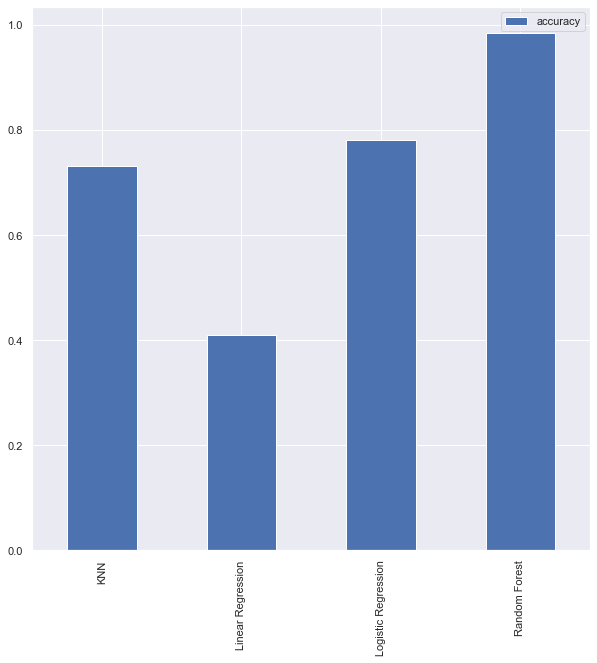

In [95]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

# Hyperparameter tuning and cross-validation

## Tune KNeighborsClassifier (K-Nearest Neighbors or KNN)

In [96]:
# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    knn.fit(X_train, Y_train)
    
    # Update the training scores
    train_scores.append(knn.score(X_train, Y_train))
    
    # Update the test scores
    test_scores.append(knn.score(X_test, Y_test))

In [97]:
#KNN's train scores.
train_scores

[1.0,
 0.9963414634146341,
 0.9914634146341463,
 0.947560975609756,
 0.9231707317073171,
 0.8207317073170731,
 0.7914634146341464,
 0.7926829268292683,
 0.7670731707317073,
 0.7853658536585366,
 0.775609756097561,
 0.7695121951219512,
 0.7609756097560976,
 0.7817073170731708,
 0.7670731707317073,
 0.7670731707317073,
 0.75,
 0.7597560975609756,
 0.7634146341463415,
 0.7682926829268293]

Maximum KNN score on the test data: 98.54%


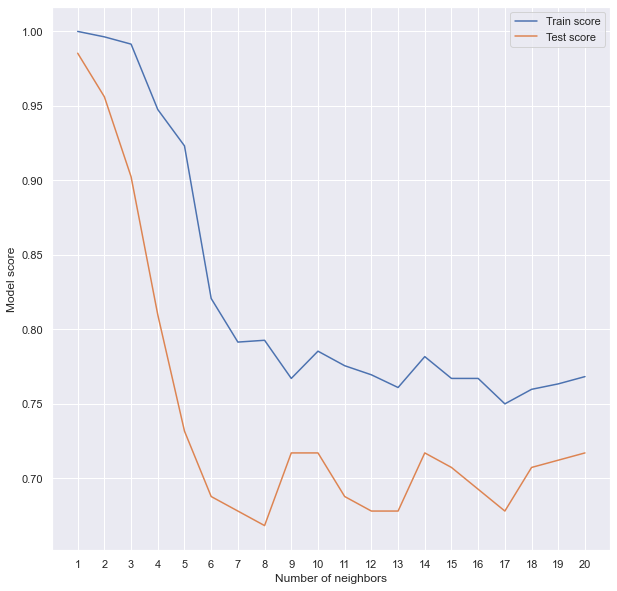

In [98]:
#plotting KNN scores

plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

# Tuning models with with RandomizedSearchCV**

In [99]:
from sklearn.model_selection import RandomizedSearchCV
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [100]:

# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, Y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [101]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [102]:
rs_log_reg.score(X_test, Y_test)

0.7853658536585366

In [103]:
# # Setup random seed
# np.random.seed(42)

# # Setup random hyperparameter search for RandomForestClassifier
# rs_rf = RandomizedSearchCV(RandomForestClassifier(),
#                            param_distributions=rf_grid,
#                            cv=5,
#                            n_iter=20,
#                            verbose=True)

# # Fit random hyperparameter search model
# rs_rf.fit(X_train, Y_train);

In [104]:
# Find the best parameters
# rs_rf.best_params_

In [105]:
model_scores 

{'KNN': 0.7317073170731707,
 'Linear Regression': 0.40960801060785457,
 'Logistic Regression': 0.7804878048780488,
 'Random Forest': 0.9853658536585366}

In [106]:
from sklearn.model_selection import GridSearchCV
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, Y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [107]:
# Check the best parameters
gs_log_reg.best_params_

{'C': 1.623776739188721, 'solver': 'liblinear'}

In [108]:
# Evaluate the model
gs_log_reg.score(X_test, Y_test)

0.7853658536585366

# Conclusion

## Did any of the techniques increase your accuracy?

In [109]:
model_scores 

{'KNN': 0.7317073170731707,
 'Linear Regression': 0.40960801060785457,
 'Logistic Regression': 0.7804878048780488,
 'Random Forest': 0.9853658536585366}

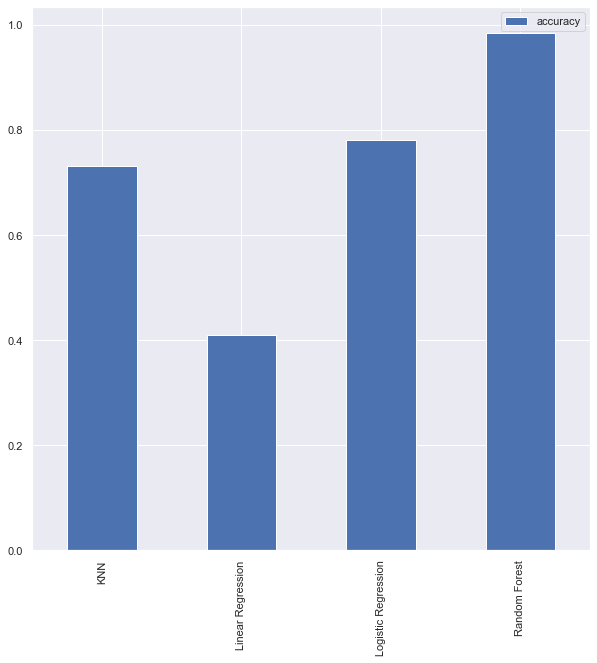

In [110]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

Based on my analysis, the accuracy score of "Random Forest" tends to be the highest of 98% followed by "Logistic Regression" with 78% then, "KNN Clasifer" with 73% and finally "Linear Regression" with only 40%.

Random forests, also known as neural nets, provide estimates for variable importance. They also provide a preferable way for dealing with data that is missing. Missing values are filled in by the variable that appears the most in a given node. Random forests outperform all other classification methods in terms of accuracy.

The random forest technique can also handle large datasets with thousands of variables. When a class is more infrequent than other classes in the data, it can automatically balance data sets. The approach also works quickly with variables, making it suited for more complex tasks.
